# Seaborn practice | Getting to know the library & variables

Aproach: Simply understandind the library and uses with specific library variables

+ Understanding that for seaborn the modules have its own uses when plotting for 1.statisticals 2.distributions and 3.categorical among others

# Overall conclusions

For lecture simplicity, I´ll leave right here the main conclusions or learnings

1. Seaborn has its own way of including charts variables. The web page mentions some differences for statistics 
purpose, categorical plots and distributions among others, thats interesting, the charts show more accuracy you could say, by using the correct figure according to its purpose.

2. This notebook includes the theme "darkgrid" which makes the graphs prettier

3. I found myself wanting to underline some text, it was interesting to see that the easiest way to do it was using some html language, bolds and italic did not need that html.

4. I´m well aware that this exercise was executed with seaborn data, so it was not very hard to get nice charts, but still, is clear that to get an effective good looking chart, the data needs to be organized and understood first.

5. The reason to start this seaborn lesson this soon in the learning curve you could say, is because I truly believe that a good looking and clear plot speaks loudly and is more eye catching for effective communication, which I thing is sometimes underrated.


# Step by step

## Installing libraries & <u>dependencies</u>

In [71]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import seaborn.objects as so

sns.set_theme(style="darkgrid")   #This makes your charts to look waaaay better, try this without the style, youll fell in love with this style.

## Load/import/read  data

In [5]:
tips = sns.load_dataset('tips')

## Plotting distribution plots

"An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. <u>What range do the observations cover? What is their central tendency? Are they heavily skewed in one direction? Is there evidence for bimodality? Are there significant outliers? </u> Do the answers to these questions vary across subsets defined by other variables?"
Seaborn website

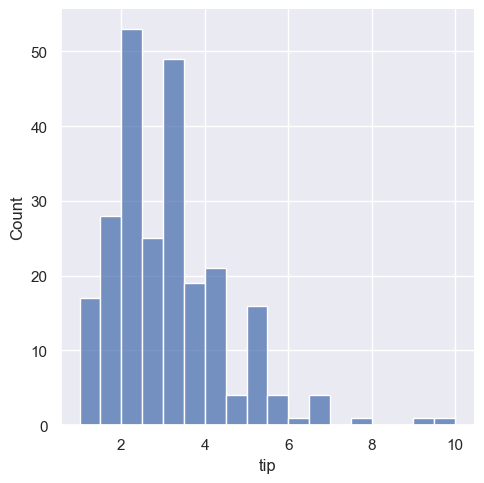

In [120]:
# Plotting 1 variable | Note the bar legth and meaning for outliers

sns.displot(tips, x='tip')

<Axes: xlabel='total_bill', ylabel='Count'>

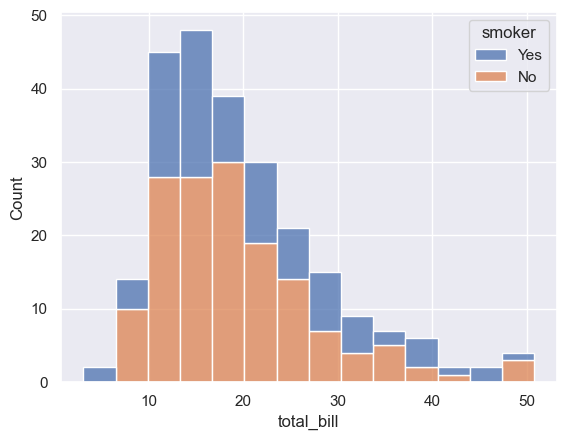

In [72]:
# Histograms analize [1] variable, that´s why here 'y' variable is not mandatory **[Distribution plot|displot]**.
# Nevertheless, 'hue' can assign a new lecture

sns.histplot(data = tips ,x= 'total_bill',hue= 'smoker', multiple= 'stack')

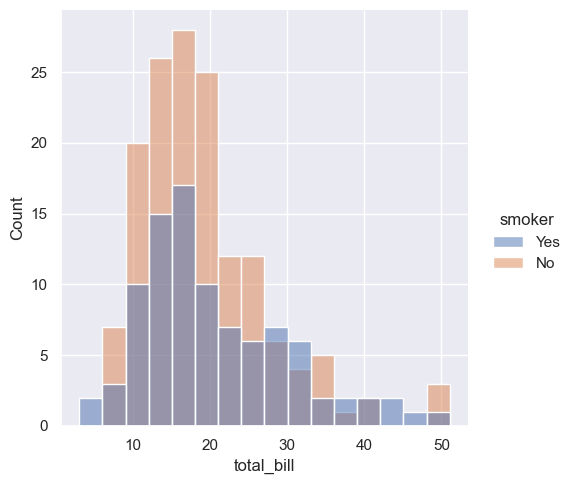

In [119]:
# Changing the bin size & using the displot to be more accurate | by default plots a histogram
# Notest that you nedd less arguments, just the df name 

sns.displot(tips,              # No need for data = tips
            x='total_bill', 
            hue='smoker',
           binwidth= 3,        #Adjust the binwidth
           )

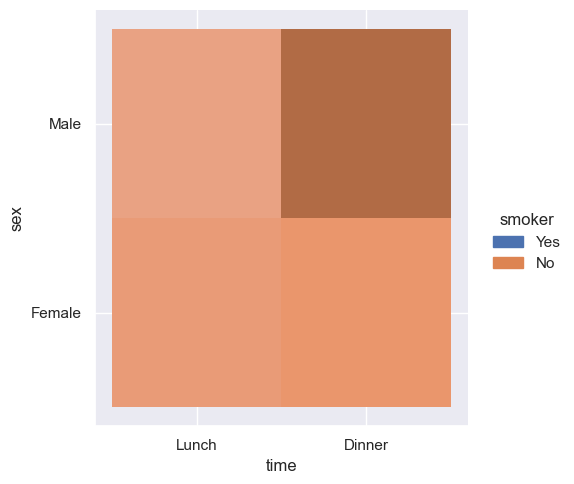

In [134]:
# Bivariate distribution | Assesing a second variable 'y' shows rentangles with the count of observations_ brings a type of heatmap

sns.displot(tips, x='time', y='sex', hue='smoker') 

<Axes: xlabel='total_bill', ylabel='Density'>

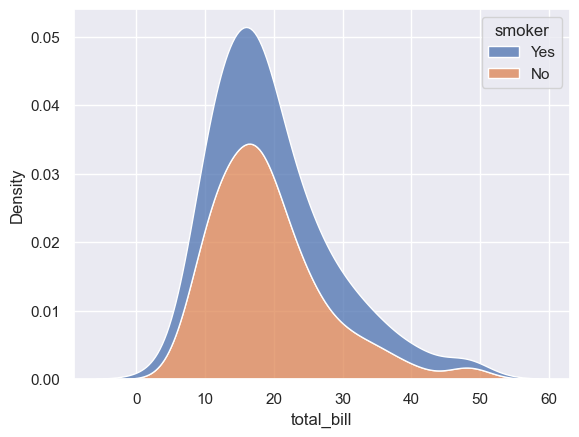

In [73]:
# This kernel density plot does not need the 'y' variable either **[Distribution plot | displot]**.
# You can put the first figure level of the plot Ej.displot and then include the kind: Ej.kdeplot
# |sns.distplot(data = tips,x = 'total_bill', hue= 'smoker', multiple = 'stack',kind= 'kde')

sns.kdeplot(data = tips,x = 'total_bill', hue= 'smoker', multiple = 'stack')

In [ ]:
# Notest that using this form the plt is cleaner,the legend is placed outside,frames also differ. **Preferred**

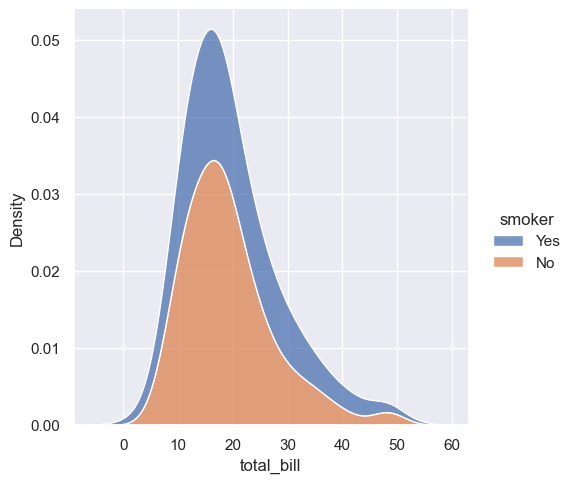

In [74]:
sns.displot(data=tips, x= 'total_bill', hue = 'smoker', multiple ='stack', kind= 'kde')

## Facet in Seaborn library

"The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots. For example, instead of stacking the three distributions for each species of penguins in the same axes, we can “facet” them by plotting each distribution across the columns of the figure." Seaborn website

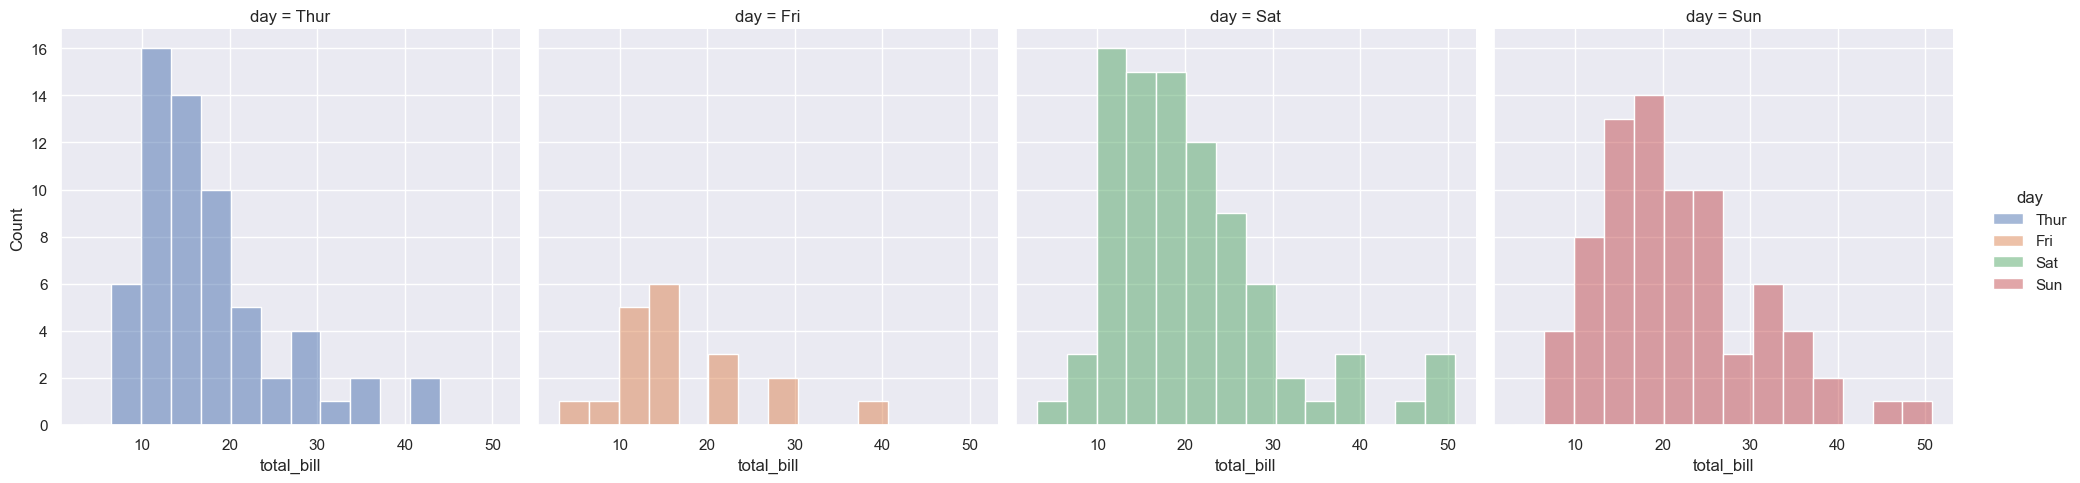

In [75]:
sns.displot(data= tips, x= 'total_bill', hue= 'day', col= 'day')

Beautiful!

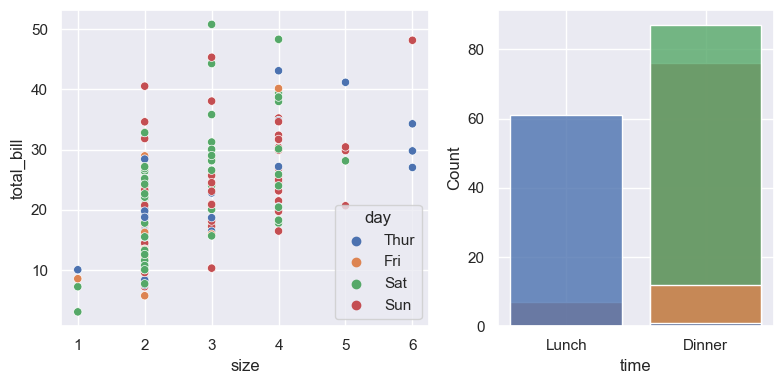

In [76]:
# Scatterplots |Relational | Relplot + Subplots
# By definition, scatterplots requier a 'y'variable to compare

f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))           # Draw the frame

sns.scatterplot(data=tips, x='size', y='total_bill', hue="day", ax=axs[0])                   # Plot 1:Scatterplot

sns.histplot(data=tips, x='time', hue='day', shrink=.8, alpha=.8, legend=False, ax=axs[1])   # Plot 2:Histogram

f.tight_layout()                                                                            # Layout type

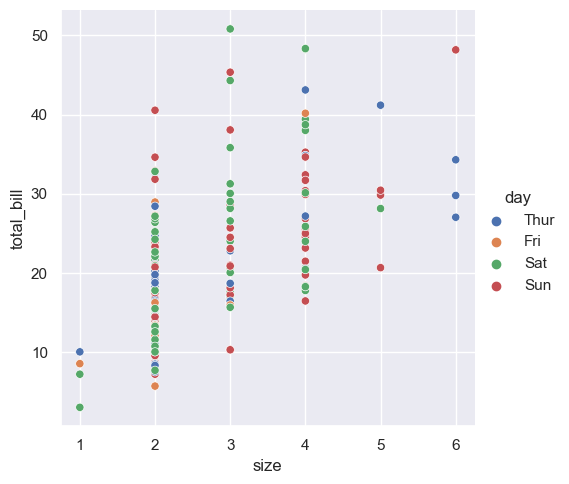

In [77]:
sns.relplot(data=tips, x='size', y='total_bill', hue='day', kind='scatter')

## Statistical Plot | Relations

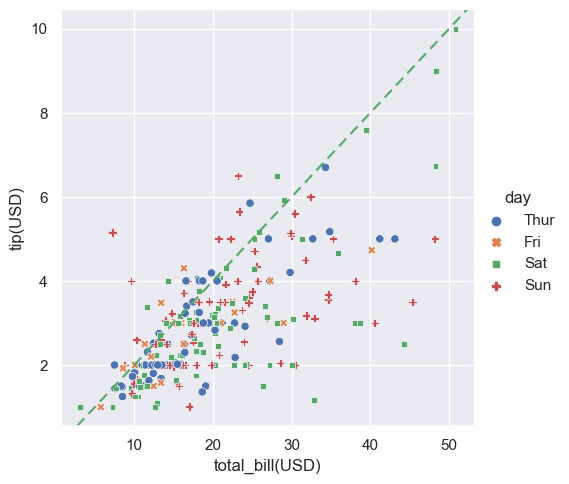

In [84]:
# Preffered for a scatterplot| relplot, including axis

g = sns.relplot(data=tips, x="total_bill", y="tip", hue='day',style='day') # Draw the scatterplot | 'Style' gives each day a form

g.ax.axline(xy1=(10, 2), slope=.2, color="g", dashes=(5, 3))   # Adjust the axline

g.set_axis_labels('total_bill(USD)', 'tip(USD)')               # Personalize the labels Ex.USDa

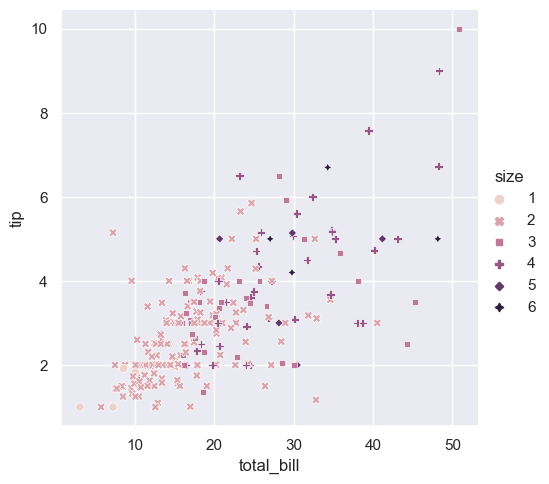

In [86]:
sns.relplot(
    data=tips, 
    x='total_bill', 
    y='tip',
    hue='size',
    style='size'
) 

#the color palette changes because the hue has a numeric value (possibly float)

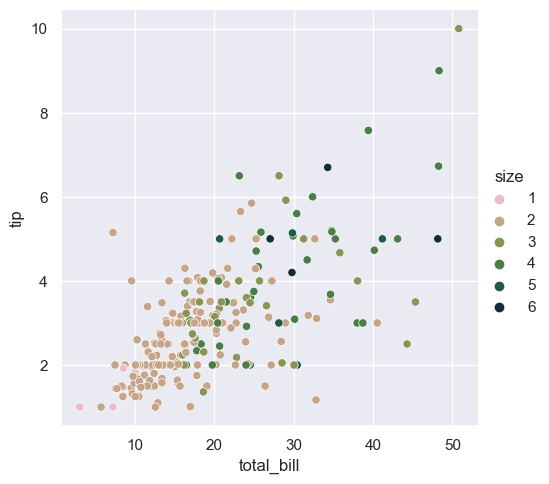

In [94]:
# Change the color palette | as every change more than aesthetic, should be helpul to read the info

sns.relplot(
    data=tips,
    x='total_bill', y='tip',
    hue='size', palette='ch:r=-0.9,l=.80'
)


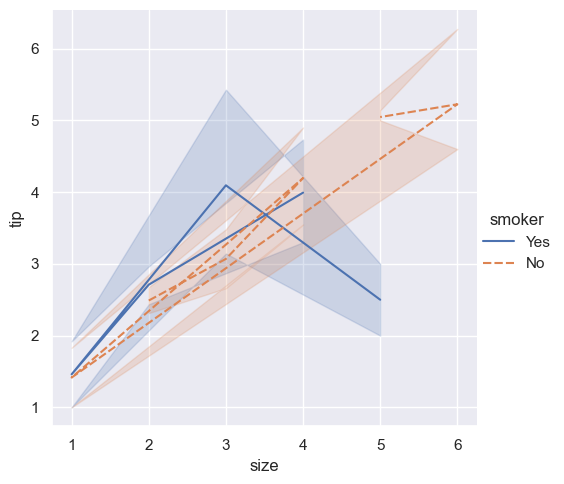

In [111]:
# relplot by deafult uses scatterplot,to make a line chart, include de 'kind'

sns.relplot(
    data=tips, 
    kind='line', 
    sort=False,        # this is necessary when 'y' is noy the result of a variation in 'x' |Common use of linechart dow jones index line time (x)and price(y)
    x='size',
    y='tip',
    hue='smoker',
    style='smoker',
)

g.set_axis_labels('size(N)', 'tip(USD)') 

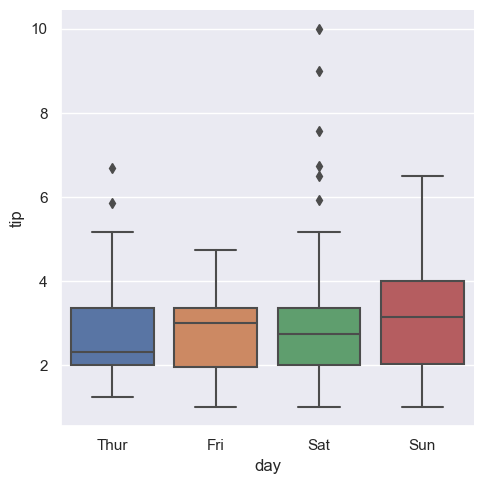

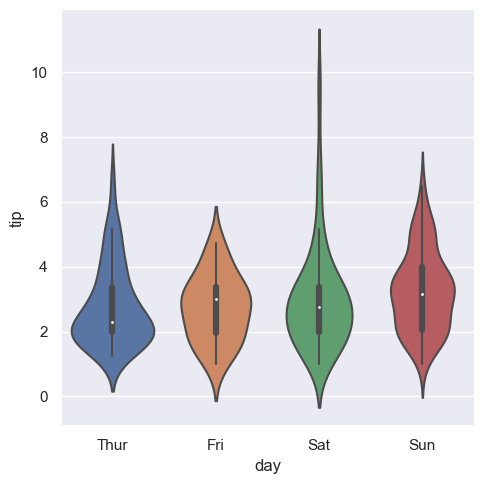

In [79]:
# Boxplot | Categorical Plot | Catplot

sns.catplot(data=tips,x='day', y='tip', kind= 'box')
sns.catplot(data=tips,x='day', y='tip', kind= 'violin')

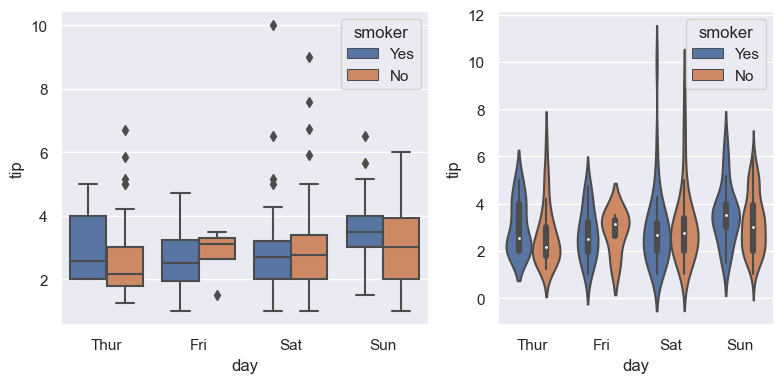

In [82]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))

sns.boxplot(data=tips, x='day', y='tip', hue='smoker', ax=axs[0])
sns.violinplot(data=tips, x='day', y='tip', hue='smoker', ax=axs[1])
f.tight_layout()